# Project - Car price prediction using Decesion Tree, Random Forest & AdaBoost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
A=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv.csv')
A.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,ritz,2014,3.35,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,42367,Diesel,Dealer,Manual,0


In [3]:
A.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
X=A.drop(labels=['selling_price','name'],axis=1)
Y=A[['selling_price']]
X.head(10)

,year,km_driven,fuel,seller_type,transmission,owner
0,2014,27000,Petrol,Dealer,Manual,0
1,2013,43000,Diesel,Dealer,Manual,0
2,2017,6900,Petrol,Dealer,Manual,0
3,2011,5200,Petrol,Dealer,Manual,0
4,2014,42450,Diesel,Dealer,Manual,0
5,2018,2071,Diesel,Dealer,Manual,0
6,2015,18796,Petrol,Dealer,Manual,0
7,2015,33429,Diesel,Dealer,Manual,0
8,2016,20273,Diesel,Dealer,Manual,0
9,2015,42367,Diesel,Dealer,Manual,0


In [5]:
Y.head(10)

,selling_price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
5,9.25
6,6.75
7,6.50
8,8.75
9,7.45


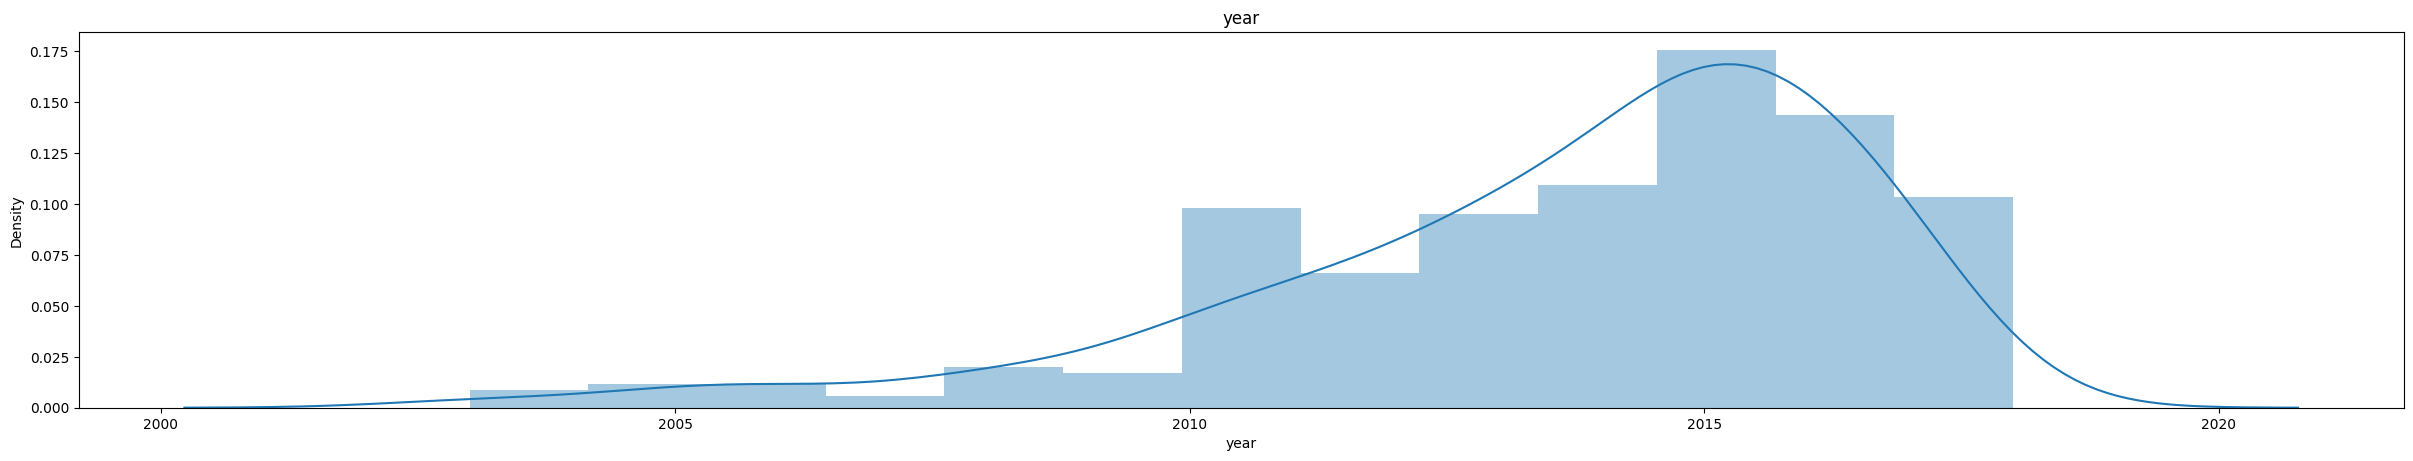

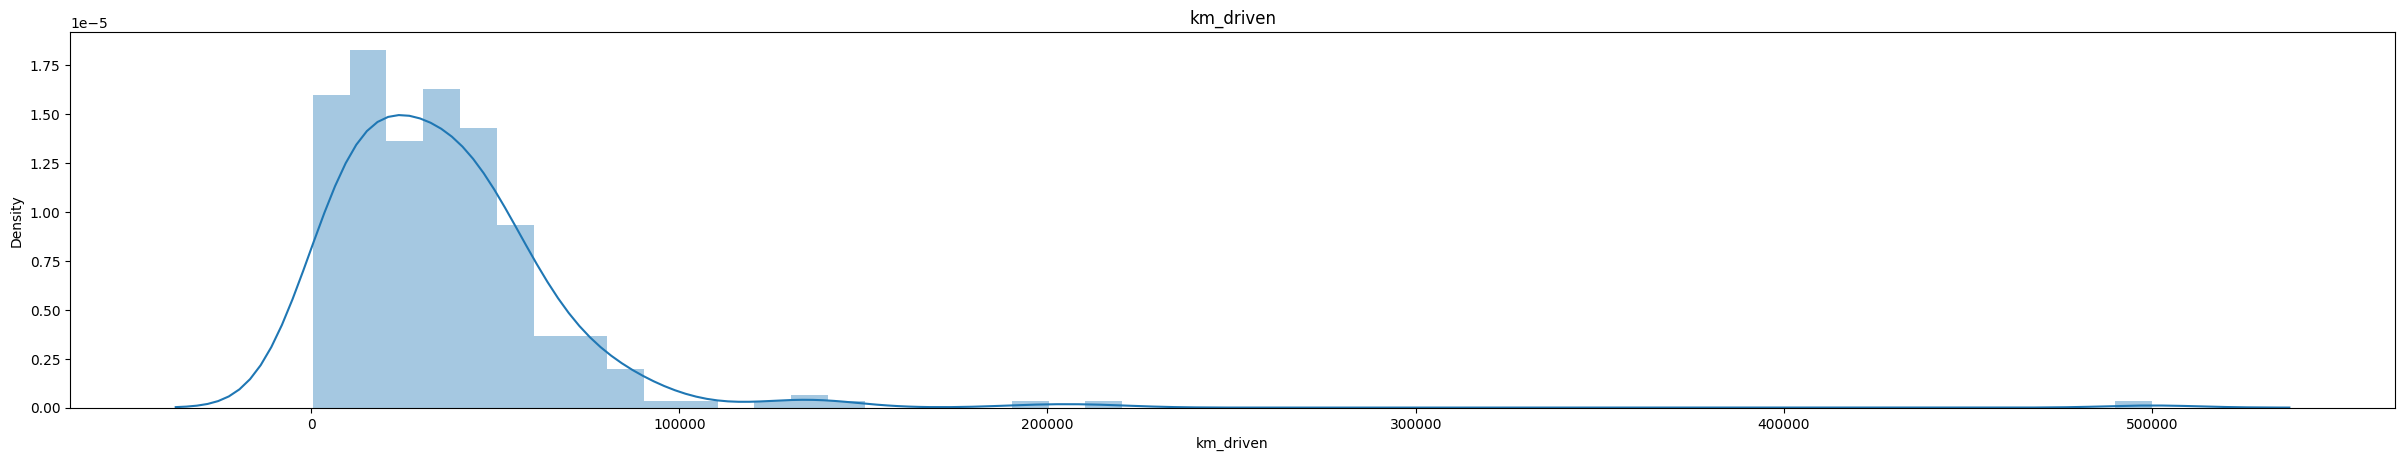

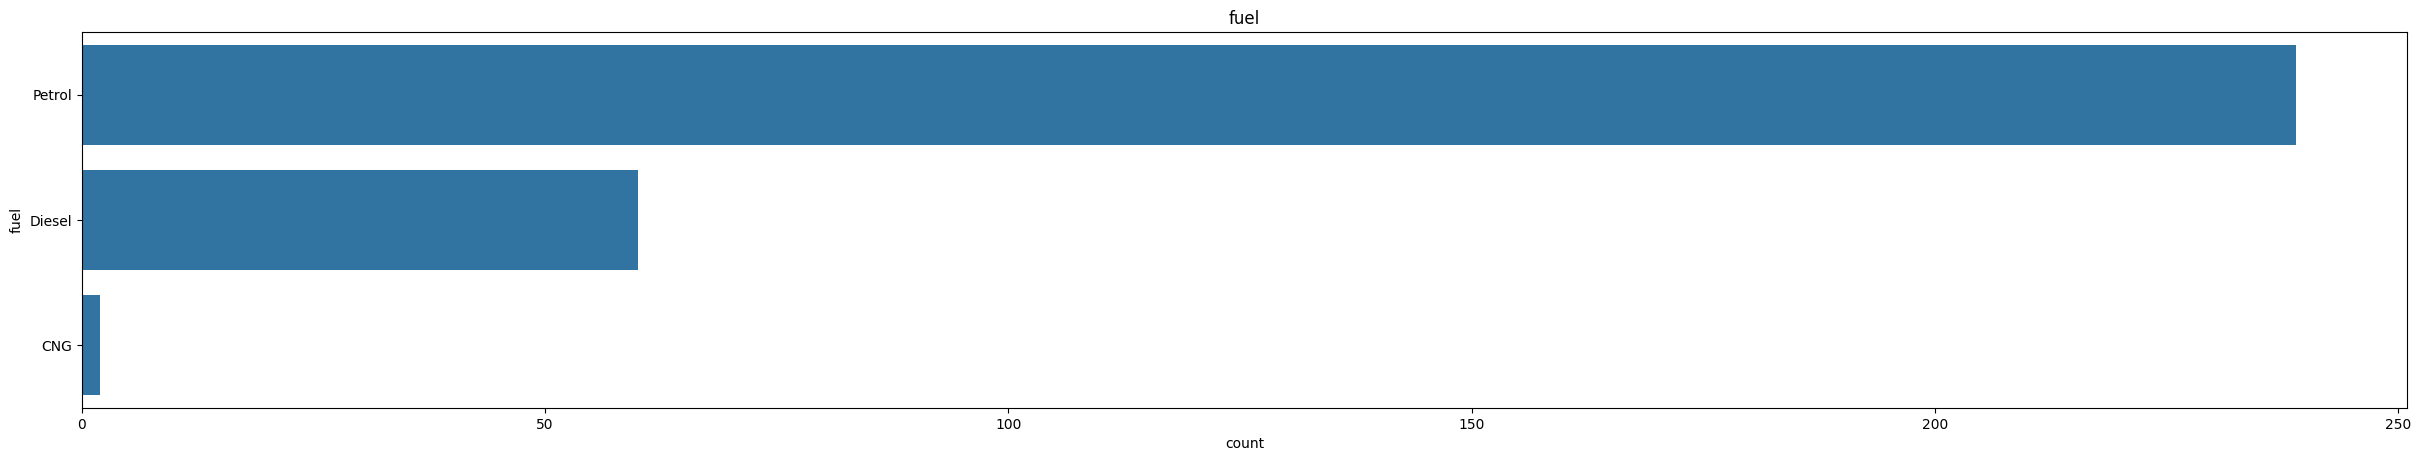

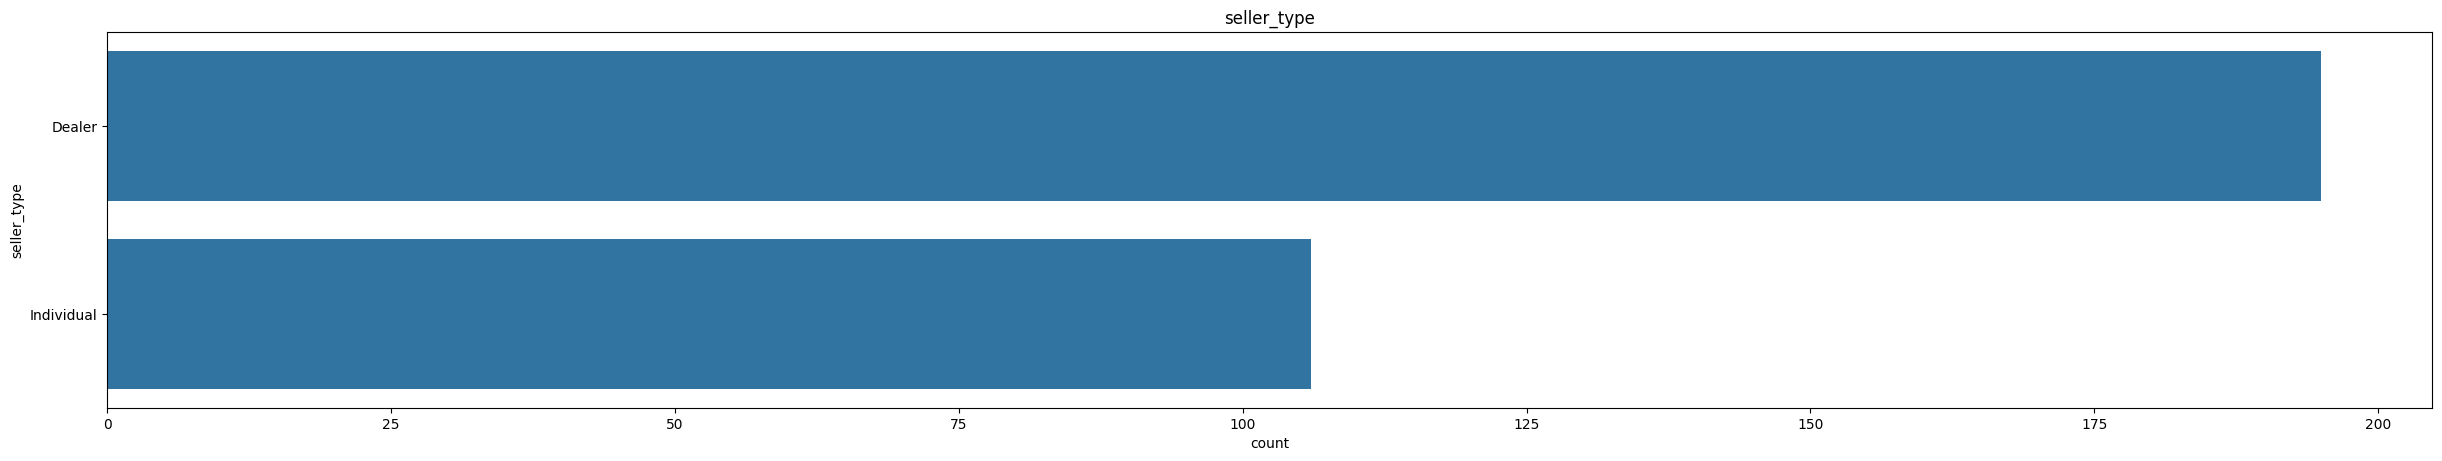

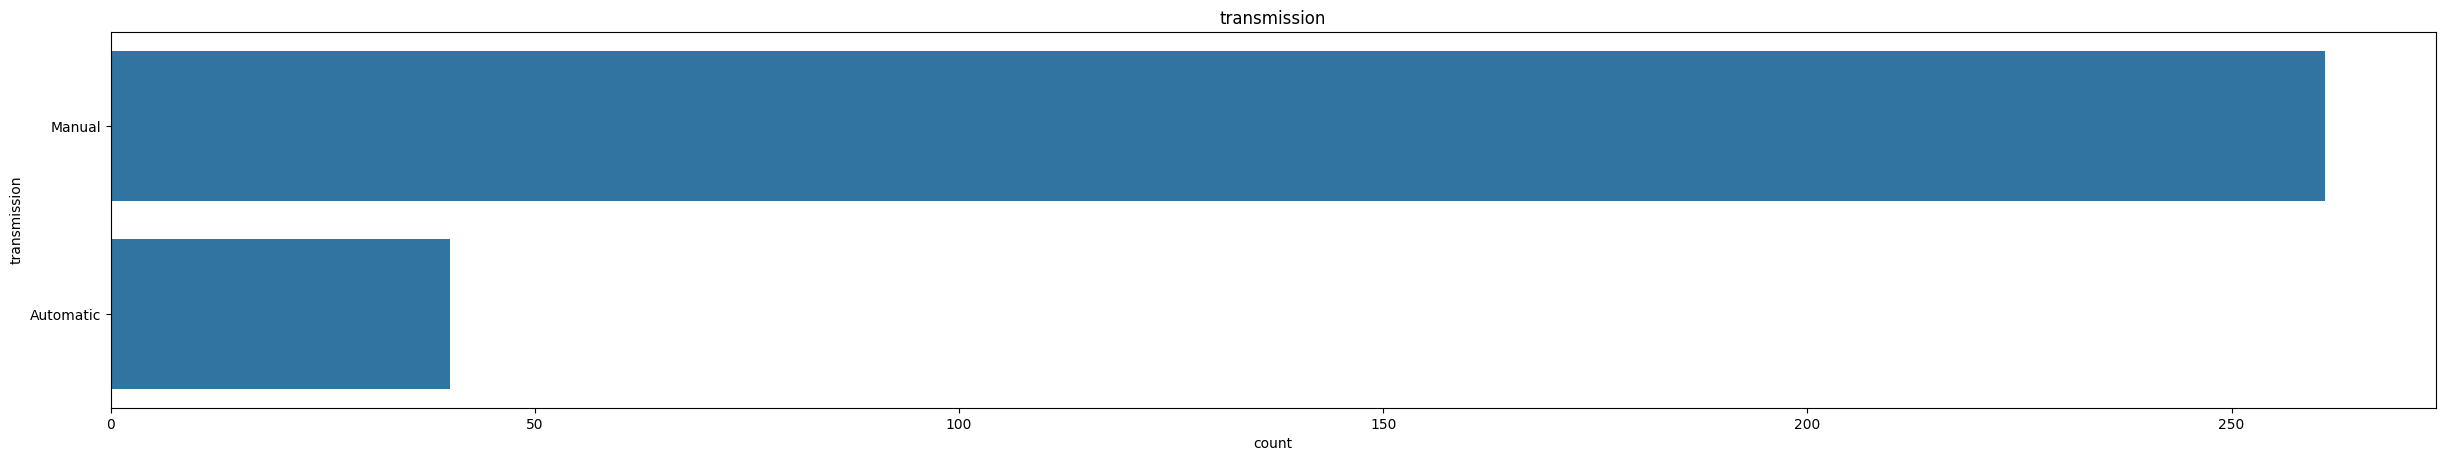

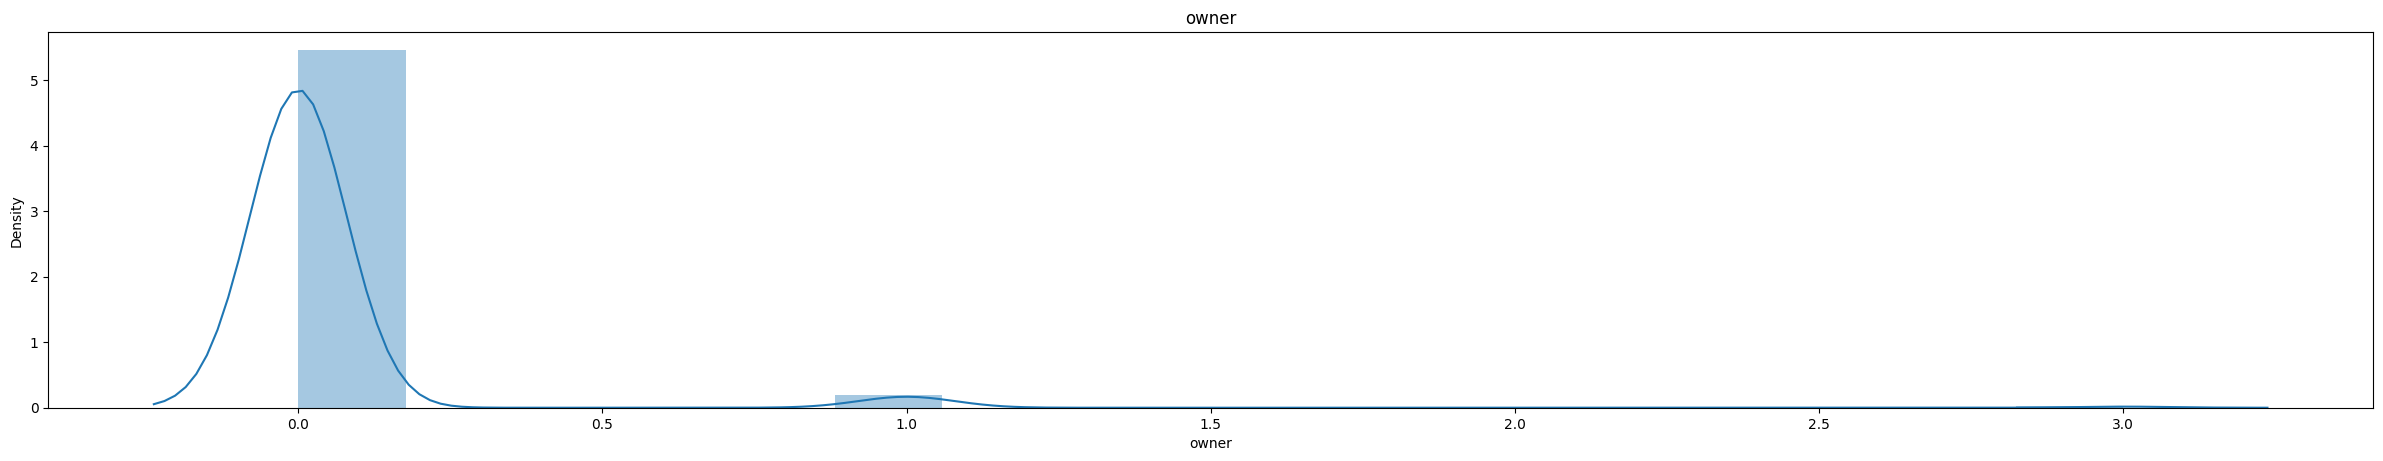

In [6]:
x=1
for i in X.columns:
    plt.figure(figsize=(30,40))
    if(X[i].dtypes=="object"):
        plt.subplot(7,1,x)
        x=x+1
        sb.countplot(X[i])
        plt.title(i)
    else:
        plt.subplot(7,1,x)
        x=x+1
        sb.distplot(X[i])
        plt.title(i)
            

### Scaling data using StandardScaler & One Hot Encoding

In [7]:
cat=[]
con=[]
for i in X.columns:
    if X[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)
X1=pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X2=pd.DataFrame(ss.fit_transform(X[con]),columns=con)
Xnew=X2.join(X1)
Xnew.head(20)

,year,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,0.128897,-0.256224,-0.174501,False,False,True,True,False,False,True
1,-0.217514,0.155911,-0.174501,False,True,False,True,False,False,True
2,1.168129,-0.773969,-0.174501,False,False,True,True,False,False,True
3,-0.910335,-0.817758,-0.174501,False,False,True,True,False,False,True
4,0.128897,0.141743,-0.174501,False,True,False,True,False,False,True
5,1.514540,-0.898356,-0.174501,False,True,False,True,False,False,True
6,0.475308,-0.467547,-0.174501,False,False,True,True,False,False,True
7,0.475308,-0.090623,-0.174501,False,True,False,True,False,False,True
8,0.821718,-0.429501,-0.174501,False,True,False,True,False,False,True
9,0.475308,0.139605,-0.174501,False,True,False,True,False,False,True


### Spliting data into training and testing

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=23)

## Decision tree regressor for model

In [9]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
tr_err

0.03805555555555555

In [10]:
ts_err

1.9852459016393444

## PRUNING

### 1. Minimum samples Split

In [11]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_split':range(1,20,1)}
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 13}

In [12]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23,min_samples_split=3)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.3975972222222222 testing_error-->  1.7186885245901637


### 2. Minimum Samples Leaf

In [13]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_leaf':range(1,20,1)}
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 4}

In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23,min_samples_leaf=5)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  1.2402881613756616 testing_error-->  1.4344189435336978


### 3. Maximum Depth

In [15]:
from sklearn.model_selection import GridSearchCV
tg={'max_depth':range(1,20,1)}
cv=GridSearchCV(dtr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 4}

In [16]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=23,max_depth=8)
model=dtr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.47021535894660893 testing_error-->  1.8857142857142857


##  Used Random Forest Regressor for model

In [17]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.6453214211309523 testing_error-->  1.5198700234192046


## Pruning in Random Forest

### 1. Maximum Depth

In [18]:
from sklearn.model_selection import GridSearchCV
tg={'max_depth':range(1,20,1)}
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'max_depth': 4}

In [19]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23,max_depth=11)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.6683802714885242 testing_error-->  1.491064745834845


### 2. Minimum Samples Splits

In [20]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_split':range(1,20,1)}
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_split': 12}

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23,min_samples_split=2)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.6453214211309523 testing_error-->  1.5198700234192046


### 3. Minimum Samples Leaf

In [22]:
from sklearn.model_selection import GridSearchCV
tg={'min_samples_leaf':range(1,20,1)}
cv=GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'min_samples_leaf': 2}

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=23,min_samples_leaf=2)
model=rfr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.9888949170725108 testing_error-->  1.4669688655288242


# Used Adaboost Algo for Model traning

In [24]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23))
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.22186309523809525 testing_error-->  1.8970443900361937


## Pruning in AdaBoost

### 1. Maximum Depth

In [25]:
from sklearn.model_selection import GridSearchCV
tg={'n_estimators':range(1,50,1)}
cv=GridSearchCV(abr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel=cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 12}

In [26]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23,max_depth=8),n_estimators=9)
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err) 

training error-->  0.4186727159495222 testing_error-->  1.8729439881851941


# The best error i got ^

In [27]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23,min_samples_split=2),n_estimators=9)
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.13899999999999998 testing_error-->  1.8668032786885247


In [28]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(DecisionTreeRegressor(random_state=23,min_samples_leaf=5),n_estimators=9)
model=abr.fit(xtrain,ytrain)
pred_tr=model.predict(xtrain)
pred_ts=model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err=mean_absolute_error(pred_tr,ytrain)
ts_err=mean_absolute_error(pred_ts,ytest)
print('training error--> ',tr_err,'testing_error--> ',ts_err)

training error-->  0.9909179946393764 testing_error-->  1.6620299186241811


## I got best model accuracy on Adaboost regressor where i used n_estmators=9 and max_depth=8